In [40]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from enum import Enum

In [41]:
# Receive dataframe from Preprocessing
%store -r pre_df

# Converge personality into one column and remove the other columns.
# 1 = extrovert; 0 = introvert
pre_df["Personality"] = pre_df["Personality_Extrovert"]
pre_df = pre_df.drop(["Personality_Extrovert", "Personality_Introvert"], axis="columns")

# Save predictors array for re-use
predictors = ["Time_spent_Alone", "Post_frequency", "Going_outside", "Social_event_attendance"]

## Transform Data
The data is not normally distributed and will need to be transformed in some way. We can scale predictors as proportions $\frac{x}{max(x)}$, as each predictor has a different survey scale range (0-5, 0-7, 0-11, etc). Or we can apply natural log or square root operations to each predictor.

In [42]:
# Apply transformation to each variable

def transform(dataframe):
    for column in predictors:
        # Get proportion of responses.
        dataframe[column] = dataframe[column] / max(pre_df[column])

        # Apply log transform
        # dataframe[column] = np.where(dataframe[column] > 0, np.log(dataframe[column]), np.nan)

        # Apply square root transformation
        # dataframe[column] = np.sqrt(dataframe[column])

## (Optional) Switch Personality
We can switch the personality type of the observations to see the differences in the groups. Default setting will show data points from both introverts and extroverts. This is necessary as there are known outliers that may influence the inference of the model.

In [43]:
class Personality(Enum):
    introvert = (0, "Introvert")
    extrovert = (1, "Extrovert")

def switch_personality(personality: Personality | None = None):
    if personality:
        return pre_df[pre_df["Personality"] == personality.value[0]]
    else:
        return pre_df

pre_df = switch_personality()

## Ridge Regression

Mean Squared Error: 6.183768049363361
Mean Squared Error: 6.183768049363361
Mean Squared Error: 6.183768049363361
Mean Squared Error: 6.183768049363361


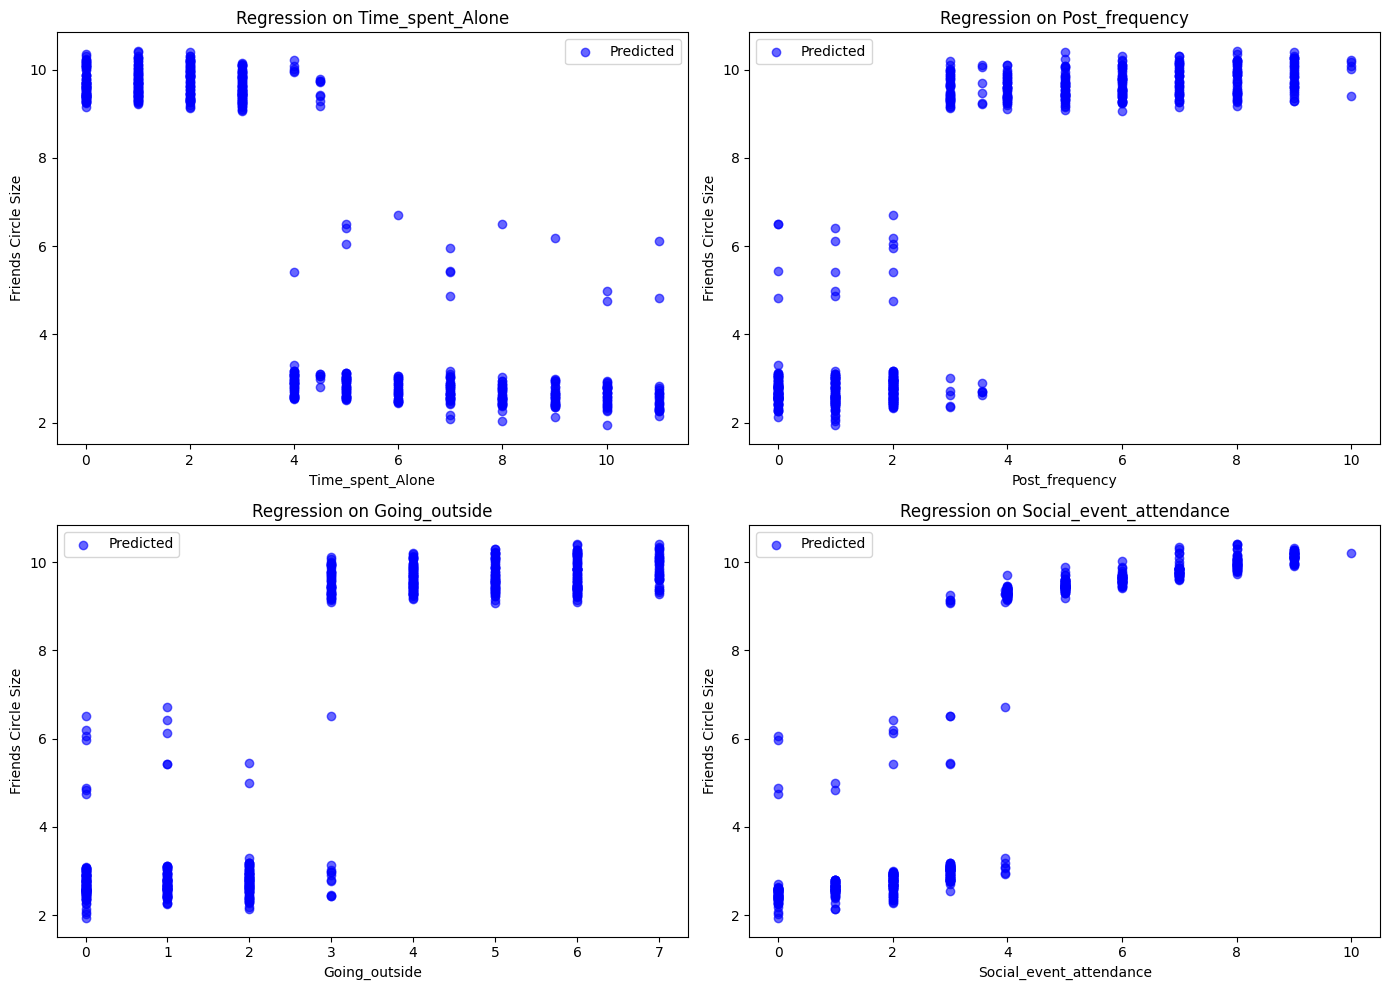

In [45]:
from numpy import mean

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, predictor in enumerate(predictors):
    ax = axs[i]
    X = pre_df.drop('Friends_circle_size', axis=1)
    y = pre_df['Friends_circle_size']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1863)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    x_vals = np.linspace(X_train[predictor].min(), X_train[predictor].max(), 100)

    # Alpha controls strength of L2 regularization
    ridge_model = Ridge(alpha=1.0).fit(X_train_scaled, y_train)

    y_pred = ridge_model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    # Plot points
    ax.scatter(
        x=X_test[predictor],
        y=y_pred,
        color="blue",
        alpha=0.6,
        label="Predicted"
    )

    # Regression line
    # ax.plot(x_vals, mean(y_pred), color='red', linewidth=2)

    ax.set_title(f'Regression on {predictor}')
    ax.set_xlabel(predictor)
    ax.set_ylabel('Friends Circle Size')
    ax.legend()
plt.tight_layout()
plt.show()